In [81]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
clinical_trial_data_to_load ="01-Lesson-Plans_05-Matplotlib_Homework_V1_Pymaceuticals_data_clinicaltrial_data.csv"
mouse_drug_data_to_load = "01-Lesson-Plans_05-Matplotlib_Homework_V1_Pymaceuticals_data_mouse_drug_data.csv" 


# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_df = pd.read_csv(clinical_trial_data_to_load)
drug_df = pd.read_csv(mouse_drug_data_to_load)
# Combine the data into a single dataset
combined_df=pd.merge(clinical_df,drug_df, on="Mouse ID", how="outer")

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [82]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_df=combined_df.groupby(["Drug", "Timepoint"])
mean_tumor_vol=group_df["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tum_vol_df= pd.DataFrame(mean_tumor_vol).reset_index()
# Preview DataFrame
tum_vol_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [83]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stand_error = group_df["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
sem_df=pd.DataFrame(stand_error).reset_index()
# Preview DataFrame
sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [84]:
# Minor Data Munging to Re-Format the Data Frames
new_df = tum_vol_df.pivot(columns ="Drug",
                          index = "Timepoint",
                          values = "Tumor Volume (mm3)") 
# Preview that Reformatting worked
new_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


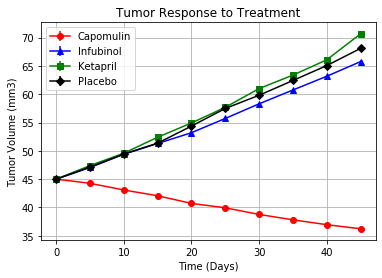

In [85]:
# Generate the Plot (with Error Bars)
plt.errorbar(Time, new_df["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red",)
plt.errorbar(Time, new_df["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue")
plt.errorbar(Time, new_df["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "s", color="green")
plt.errorbar(Time, new_df["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "D", color="black")
plt.legend()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
# Save the Figure
plt.savefig("Tumor_volume_response.png")
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [86]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_df = combined_df.groupby(["Drug", "Timepoint"])
mean_met_site= group_df["Metastatic Sites"].mean()
# Convert to DataFrame
met_site_df=pd.DataFrame(mean_met_site).reset_index()
# Preview DataFrame
met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [87]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
m_stand_error = group_df["Metastatic Sites"].sem()
# Convert to DataFrame
m_sem_df=pd.DataFrame(m_stand_error).reset_index()
# Preview DataFrame
m_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [88]:
# Minor Data Munging to Re-Format the Data Frames
m_new_df = met_site_df.pivot(columns ="Drug",
                             index = "Timepoint",
                             values = "Metastatic Sites") 
# Preview that Reformatting worked
m_new_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


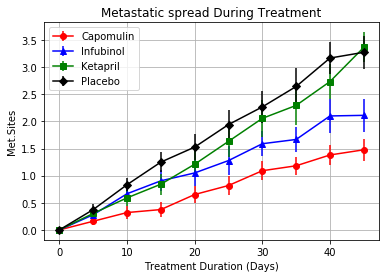

In [89]:
# Generate the Plot (with Error Bars)
Time = np.arange(0, 50, 5)
plt.errorbar(Time, m_new_df["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red")
plt.errorbar(Time, m_new_df["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue")
plt.errorbar(Time, m_new_df["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "s", color="green")
plt.errorbar(Time, m_new_df["Placebo"] , yerr= Placebo_error, label= "Placebo", marker= "D", color="black")
plt.legend()
plt.title("Metastatic spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met.Sites")
plt.grid()
# Save the Figure
plt.savefig("Metsite_Response.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [90]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
c_group_df = combined_df.groupby(["Drug", "Timepoint"])
count_mice = c_group_df["Mouse ID"].count()
# Convert to DataFrame
count_mice_df=pd.DataFrame(count_mice).reset_index()
rename_df = count_mice_df.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
rename_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [95]:
# Minor Data Munging to Re-Format the Data Frames
c_new_df = rename_df.pivot(columns ="Drug",
                             index = "Timepoint",
                             values = "Mouse Count") 
# Preview the Data Frame
c_new_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


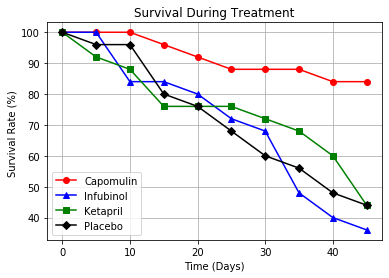

In [92]:
# Generate the Plot (Accounting for percentages)
Time = np.arange(0, 50, 5)
plt.plot(Time, (c_new_df["Capomulin"]/25)*100 , label= "Capomulin", marker= "o", color="red")
plt.plot(Time, (c_new_df["Infubinol"]/25)*100 , label= "Infubinol", marker= "^", color="blue")
plt.plot(Time, (c_new_df["Ketapril"]/25)*100 , label= "Ketapril", marker= "s", color="green")
plt.plot(Time, (c_new_df["Placebo"]/25)*100 , label= "Placebo", marker= "D", color="black")
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%) ")
plt.grid()
# Save the Figure
plt.savefig("Survival_Rate.png")
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [93]:

# Calculate the percent changes for each drug
tumor_vol = 45
Percent_Change = ((new_df.loc[45, :] - tumor_vol)/tumor_vol)*100
# Display the data to confirm
Percent_Change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64


![Metastatic Spread During Treatment](../Images/change.png)

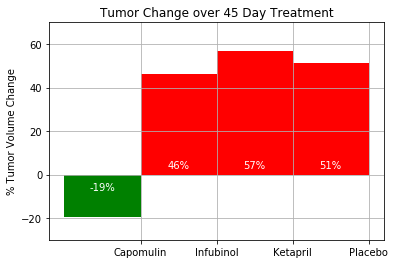

In [97]:
# Splice the data between passing and failing drugs
passing = Percent_Change < 0
# Orient widths. Add labels, tick marks, etc. 
drug_list = ["Capomulin","Infubinol","Ketapril","Placebo"]
change_list = [(Percent_Change[durg])for durg in drug_list]
change_plt = plt.bar(drug_list,change_list,width=-1,align="edge",color=passing.map({True:"green",False:"red"}))
plt.grid()
plt.ylim(-30,70)
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                "%d" % int(height)+"%",color="white",
                ha="center", va="bottom")      
# Call functions to implement the function calls
autolabel(change_plt)
# Save the Figure
plt.savefig("Summary_Bar_Graph.png")
# Show the Figure
fig.show()